### Captions EDA

This notebook is the start of the EDA for the Captions data set, this feature seems extremely intersting for us in the goal of recommeding videos to the user

### What questions I will try to answers

The columns of the dataset are

`video_id`, `manual_cover_text`, `caption`, `topic_tag`, `first_level_category_id`, `first_level_category_name`, `second_level_category_name`, `third_level_category_id`,`third_level_category_name`

- What are the proportions of empty topic tags ? 
- What are the most common topic_tags?

- How does the distribution of topic_tags vary across different first_level_category_name or second_level_category_name?

- Is there a correlation between the presence/absence of a topic_tag and video engagement

- What is the average length of caption and manual_cover_text?

- How often are manual_cover_text and caption similar or different?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'Microsoft YaHei', 'WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
big_matrix = pd.read_csv('data/big_matrix_cleaned.csv')
small_matrix = pd.read_csv('data/small_matrix_cleaned.csv')
caption_category = pd.read_csv('data/caption_category_cleaned.csv')
item_daily_features = pd.read_csv('data/item_daily_features_cleaned.csv')
item_features = pd.read_csv('data/item_features_cleaned.csv')
user_features = pd.read_csv('data/user_features_cleaned.csv')
social_network = pd.read_csv('data/social_network_cleaned.csv')

In [3]:
df_captions = pd.read_csv('data/caption_category_cleaned.csv')
print("Dataset loaded successfully.")
display(df_captions.head())

Dataset loaded successfully.


,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8.0,颜值,673.0,颜值随拍,-124.0,UNKNOWN
1,2,UNKNOWN,晚饭后，运动一下！,[],9.0,喜剧,727.0,搞笑互动,-124.0,UNKNOWN
2,3,UNKNOWN,我平淡无奇，惊艳不了时光，温柔不了岁月，我只想漫无目的的走走，努力发笔小财，给自己买花 自己长大.,[],26.0,摄影,686.0,主题摄影,2434.0,景物摄影
3,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5.0,时尚,737.0,营销售卖,2596.0,女装
4,5,UNKNOWN,“你们吵的越狠 他们的手就握的越紧” #文轩 #刘耀文 #宋亚轩 #顾子璇...,"[刘耀文,宋亚轩,文轩,顾子璇是樱桃吖,顾子璇超级喜欢文轩]",6.0,明星娱乐,667.0,娱乐八卦,2375.0,饭制


In [6]:
def parse_tag_list_revised(tag_str):
        if pd.isna(tag_str) or tag_str == 'UNKNOWN':
            return []
        
        # Convert to string just in case, and strip whitespace
        tag_str = str(tag_str).strip()
        
        if tag_str == '[]' or not tag_str:
            return []
        
        # Check if it looks like a list '[tag1,tag2]'
        if tag_str.startswith('[') and tag_str.endswith(']'):
            # Remove brackets
            content = tag_str[1:-1]
            if not content: # Handles '[]' again after stripping
                return []
            tags = [tag.strip() for tag in content.split(',') if tag.strip()]
            return tags
        else:
            return []

Analyzing 'topic_tag' column with revised parsing...

Sample of parsed tags (first 5 rows):
                        topic_tag                 parsed_tags_revised
0                              []                                  []
1                              []                                  []
2                              []                                  []
3             [五爱市场,感谢快手我要上热门,搞笑]               [五爱市场, 感谢快手我要上热门, 搞笑]
4  [刘耀文,宋亚轩,文轩,顾子璇是樱桃吖,顾子璇超级喜欢文轩]  [刘耀文, 宋亚轩, 文轩, 顾子璇是樱桃吖, 顾子璇超级喜欢文轩]
\nNumber of rows with empty parsed_tags_revised: 3255
Total rows: 9369
------------------------------
\nTop Topic Tags (Table):
parsed_tags_revised
感谢快手我要上热门        975
作品推广             824
快手创作者服务中心        490
感谢快手官大大送上热门      417
主播中心             369
快手创作者中心          347
热门               260
支持快手传播正能量        254
同城热点             237
感谢官方大大给的每一次热门    233
用快影上热门           225
推广小助手            170
爱官方爱热门           163
感谢快手平台           140
高清视频             134
今天拍点啥            121
智能推广

/tmp/ipykernel_2818479/997074457.py:60: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2818479/997074457.py:60: UserWarning: Glyph 35874 (\N{CJK UNIFIED IDEOGRAPH-8C22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2818479/997074457.py:60: UserWarning: Glyph 24555 (\N{CJK UNIFIED IDEOGRAPH-5FEB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2818479/997074457.py:60: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2818479/997074457.py:60: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2818479/997074457.py:60: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2818479/997074457.py:60: UserWarning: Glyph 19978 (\N{CJK UNIFIED I

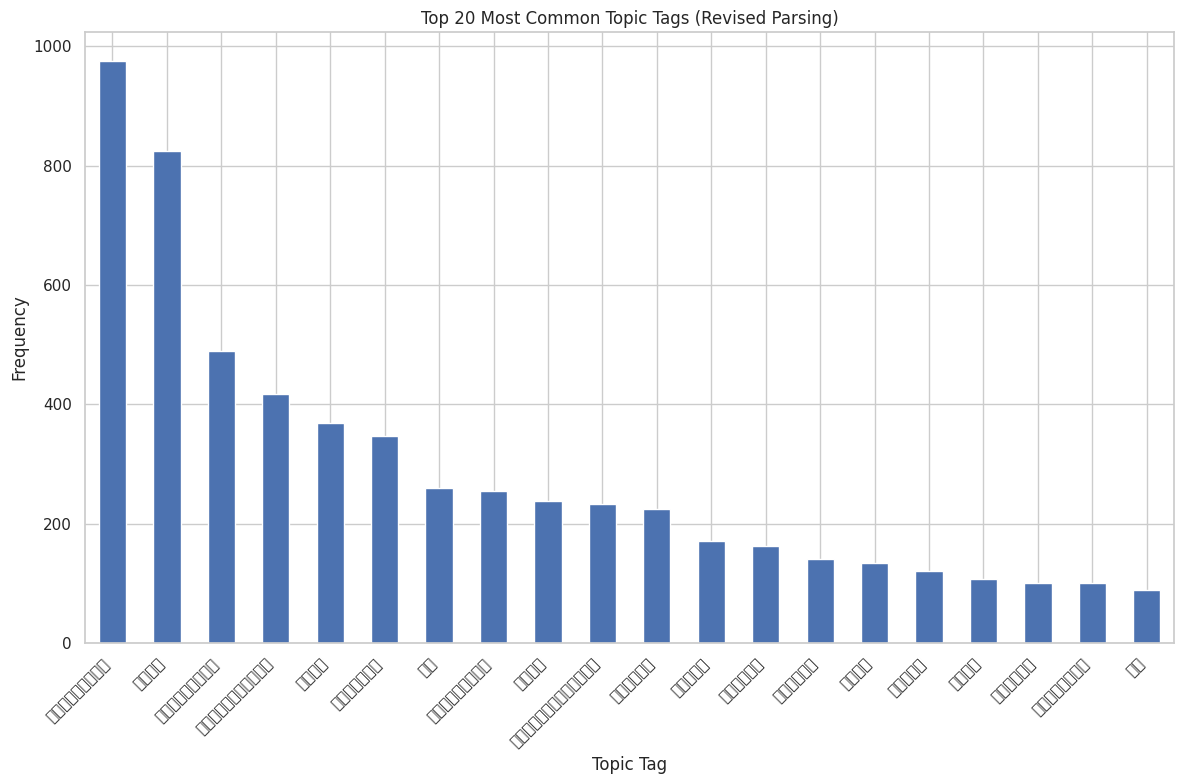

Analyzing 'topic_tag' column...

No valid topic tags found to analyze after parsing and cleaning.


In [4]:
if 'df_captions' in locals() and df_captions is not None:
    print("Analyzing 'topic_tag' column with revised parsing...\n")

    # Revised function to parse the string representation of a list


    # Apply the revised parsing function to the 'topic_tag' column
    df_captions['parsed_tags_revised'] = df_captions['topic_tag'].apply(parse_tag_list_revised)
    
    # Diagnostic: Show some parsed results
    print("Sample of parsed tags (first 5 rows):")
    print(df_captions[['topic_tag', 'parsed_tags_revised']].head())
    print("\\nNumber of rows with empty parsed_tags_revised:", (df_captions['parsed_tags_revised'].apply(len) == 0).sum())
    print("Total rows:", len(df_captions))
    print("-" * 30)

    # Explode the lists of tags into individual rows
    all_tags_revised = df_captions['parsed_tags_revised'].explode()

    # Clean the exploded tags: remove NaNs (from empty lists) and any empty strings
    all_tags_cleaned_revised = all_tags_revised.dropna().astype(str).str.strip().replace('', pd.NA).dropna()

    if not all_tags_cleaned_revised.empty:
        # Count the frequency of each tag
        tag_counts_revised = all_tags_cleaned_revised.value_counts()

        print("\\nTop Topic Tags (Table):")
        print(tag_counts_revised.head(20)) # Display top 20 tags
        print("\\n")

        # Visualize the top N topic tags
        top_n = 20
        plt.figure(figsize=(12, 8))
        sns.set_theme(style="whitegrid")
        tag_counts_revised.head(top_n).plot(kind='bar')
        plt.title(f'Top {top_n} Most Common Topic Tags (Revised Parsing)')
        plt.xlabel('Topic Tag')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print("No valid topic tags found to analyze after revised parsing and cleaning.")
        print(f"Diagnostics after explode:")
        print(f"all_tags_revised (exploded) head: {all_tags_revised.head()}")
        print(f"all_tags_revised vaimport ast # For safely evaluating string representations of lists from collections import Counter")

# Ensure df_captions is loaded before running this cell
if 'df_captions' in locals() and df_captions is not None:
    print("Analyzing 'topic_tag' column...\n")

    # Function to safely parse the string representation of a list
    def parse_tag_list(tag_str):
        if pd.isna(tag_str) or tag_str == 'UNKNOWN' or tag_str == '[]':
            return []
        try:
            # Safely evaluate the string as a Python literal (list)
            tags = ast.literal_eval(tag_str)
            if isinstance(tags, list):
                return tags
            else:
                # If it's not a list after eval, treat as empty or handle as error
                return [] 
        except (ValueError, SyntaxError):
            # If parsing fails, return an empty list
            # print(f"Warning: Could not parse tag string: {tag_str}")
            return []

    parsed_tags = df_captions['topic_tag'].fillna('[]').apply(parse_tag_list)

    # Explode the lists of tags into individual rows
    all_tags = parsed_tags.explode()

    all_tags_cleaned = all_tags.dropna().astype(str).replace('', pd.NA).dropna()


    if not all_tags_cleaned.empty:
        tag_counts = all_tags_cleaned.value_counts()

        print("Top Topic Tags (Table):")
        print(tag_counts.head(20))
        print("\\n")

        top_n = 20
        plt.figure(figsize=(12, 8))
        sns.set_theme(style="whitegrid")
        tag_counts.head(top_n).plot(kind='bar')
        plt.title(f'Top {top_n} Most Common Topic Tags')
        plt.xlabel('Topic Tag')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print("No valid topic tags found to analyze after parsing and cleaning.")

In [5]:
import pandas as pd
import numpy as np

print("Analyzing relationship between 'first_level_category_name' and presence of 'topic_tag'...")

# Ensure 'parsed_tags_revised' exists; if not, this cell might need to be run after the cell that creates it.
if 'parsed_tags_revised' not in df_captions.columns:
    print("Error: 'parsed_tags_revised' column not found. Please ensure it's created in a previous cell.")
    if 'topic_tag' in df_captions.columns:
        print("Attempting to infer 'topic_tag' presence based on 'topic_tag' column directly.")
        # Consider '[]', NaN, or 'UNKNOWN' as absence.
        # ast.literal_eval can be slow; for this check, string methods are often sufficient for '[]'
        df_captions['has_topic_tag'] = df_captions['topic_tag'].apply(
            lambda x: not (pd.isna(x) or str(x).strip() == '[]' or str(x).strip().upper() == 'UNKNOWN')
        ).astype(int)
    else:
        print("Error: 'topic_tag' column also not found. Cannot proceed.")
        df_captions['has_topic_tag'] = 0 # Placeholder
else:
    # Create 'has_topic_tag' column: 1 if parsed_tags_revised is not empty, 0 otherwise
    # An empty list evaluates to False in a boolean context
    df_captions['has_topic_tag'] = df_captions['parsed_tags_revised'].apply(lambda x: 1 if x else 0)

# Group by 'first_level_category_name' and calculate statistics
category_tag_presence = df_captions.groupby('first_level_category_name')['has_topic_tag'].agg(
    total_videos='count',
    videos_with_tags='sum'
).reset_index()

# Calculate the proportion of videos with tags
category_tag_presence['proportion_with_tags'] = category_tag_presence['videos_with_tags'] / category_tag_presence['total_videos']

# Sort by proportion for better visualization later
category_tag_presence = category_tag_presence.sort_values('proportion_with_tags', ascending=False)

print("\nProportion of videos with topic_tag by first_level_category_name:")
display(category_tag_presence)

try:
    is_chinese_char = lambda char: '\\u4e00' <= char <= '\\u9fff'
    category_tag_presence['category_has_chinese'] = category_tag_presence['first_level_category_name'].apply(
        lambda name: any(is_chinese_char(char) for char in str(name))
    )
    if category_tag_presence['category_has_chinese'].any():
        print("\\nWarning: Some 'first_level_category_name' values seem to contain Chinese characters.")
        print("Plotting these directly might lead to display issues if fonts are not configured.")
        print("Consider translating category names or ensuring Matplotlib can render Chinese characters if issues arise.")
except Exception as e:
    print(f"Could not check for Chinese characters in category names: {e}")



Analyzing relationship between 'first_level_category_name' and presence of 'topic_tag'...

Proportion of videos with topic_tag by first_level_category_name:


,first_level_category_name,total_videos,videos_with_tags,proportion_with_tags
33,读书,62,59,0.951613
21,星座命理,36,34,0.944444
5,健康,173,162,0.936416
16,教育,52,48,0.923077
6,健身,159,146,0.918239
28,美妆,137,125,0.912409
13,情感,482,421,0.873444
4,人文,44,38,0.863636
12,影视综,58,50,0.862069
14,房产家居,36,31,0.861111


Loading interaction data (small_matrix.csv)...
Interaction data loaded successfully.


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,hour,day
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,2020-07-04 21:27:48.378000021,0.722103,21,5
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,2020-07-04 21:28:00.056999922,1.907377,21,5
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,2020-07-04 21:29:09.479000092,2.063311,21,5
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,2020-07-04 21:30:43.285000086,0.566388,21,5
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,2020-07-04 21:35:43.459000111,0.418364,21,5



Merging interaction data with captions data...
Merge complete. Shape of merged data: (4280217, 11)


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,hour,day,has_topic_tag
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,2020-07-04 21:27:48.378000021,0.722103,21,5,0
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,2020-07-04 21:28:00.056999922,1.907377,21,5,0
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,2020-07-04 21:29:09.479000092,2.063311,21,5,0
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,2020-07-04 21:30:43.285000086,0.566388,21,5,0
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,2020-07-04 21:35:43.459000111,0.418364,21,5,1



Aggregating engagement metrics per video_id...
Aggregation complete.


,video_id,has_topic_tag,avg_watch_ratio,avg_play_duration,interaction_count
0,103,1,0.781970,8054.290633,1249
1,109,1,1.044308,8111.143922,1341
2,120,0,1.411307,8856.313697,1358
3,122,1,0.846462,8239.458658,1282
4,130,1,0.846409,8484.570652,1288



Comparing average engagement for videos with and without topic_tag:
Engagement comparison:


,has_topic_tag,mean_avg_watch_ratio,median_avg_watch_ratio,mean_avg_play_duration,median_avg_play_duration,total_videos_in_group
0,No Topic Tag,0.959667,0.955206,8625.841468,8558.759773,1343
1,Has Topic Tag,0.867202,0.869269,8575.526164,8517.103143,1824


/tmp/ipykernel_2818479/248942574.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_topic_tag', y='avg_watch_ratio', data=video_engagement_summary, ax=axes[0], palette="coolwarm")
/tmp/ipykernel_2818479/248942574.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No Topic Tag', 'Has Topic Tag'])
/tmp/ipykernel_2818479/248942574.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_topic_tag', y='avg_play_duration', data=video_engagement_summary, ax=axes[1], palette="coolwarm")
/tmp/ipykernel_2818479/248942574.py:93: UserWarning: set_ticklabels() should only be used

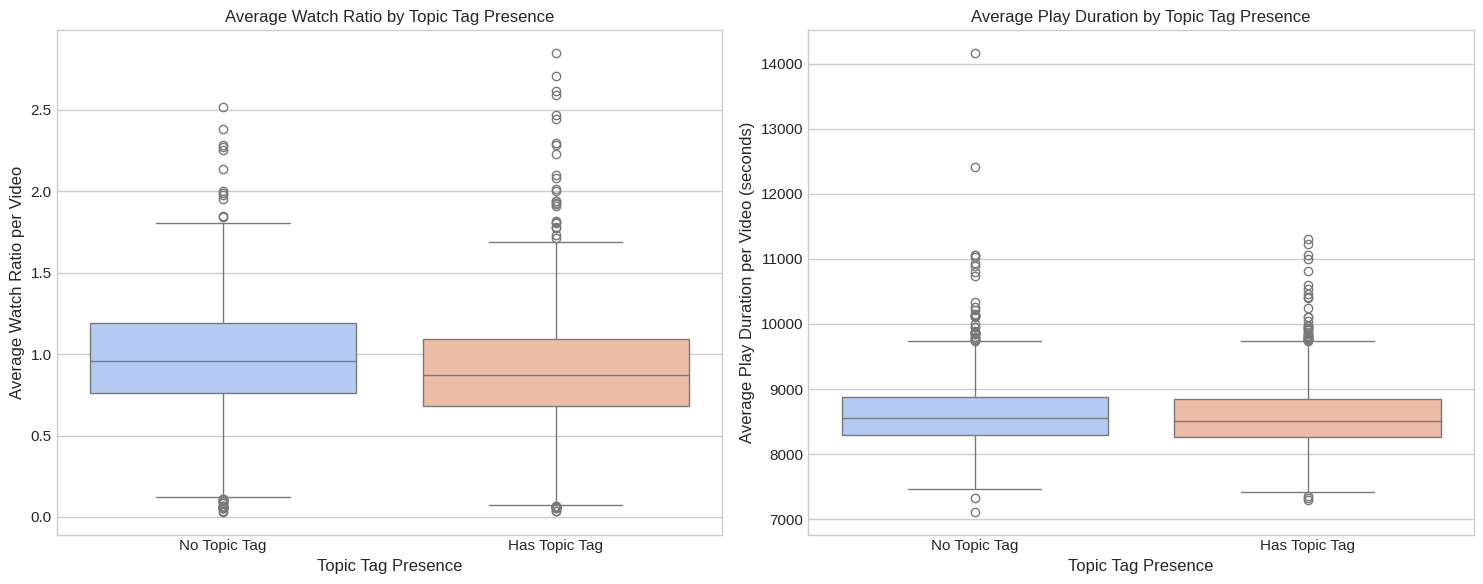

In [6]:

# --- Part 1: Load interaction data and merge ---
print("Loading interaction data (small_matrix.csv)...")
try:
    df_interactions = pd.read_csv('data/small_matrix_cleaned.csv')
    print("Interaction data loaded successfully.")
    display(df_interactions.head())
except FileNotFoundError:
    print("Error: 'data/small_matrix.csv' not found. Please ensure the file path is correct.")
    df_interactions = None
except Exception as e:
    print(f"An error occurred while loading 'data/small_matrix.csv': {e}")
    df_interactions = None

if df_interactions is not None:
    # Ensure df_captions is available and has 'has_topic_tag'
    if 'df_captions' not in locals() or 'has_topic_tag' not in df_captions.columns:
        print("Error: 'df_captions' DataFrame with 'has_topic_tag' column is not available.")
        print("Please run the previous cells to create it.")
    else:
        print("\nMerging interaction data with captions data...")
        # Select relevant columns and ensure 'video_id' is of the same type for merging
        df_captions_for_merge = df_captions[['video_id', 'has_topic_tag']].copy()
        
        try:
            df_captions_for_merge['video_id'] = pd.to_numeric(df_captions_for_merge['video_id'], errors='coerce')
            df_interactions['video_id'] = pd.to_numeric(df_interactions['video_id'], errors='coerce')

            # Drop rows where video_id could not be converted to numeric
            df_captions_for_merge.dropna(subset=['video_id'], inplace=True)
            df_interactions.dropna(subset=['video_id'], inplace=True)
            
            # Ensure video_id is int type for consistent merging
            df_captions_for_merge['video_id'] = df_captions_for_merge['video_id'].astype(int)
            df_interactions['video_id'] = df_interactions['video_id'].astype(int)

        except Exception as e:
            print(f"Warning: Could not ensure video_id types are consistent for merging: {e}")


        df_merged_engagement = pd.merge(df_interactions, df_captions_for_merge, on='video_id', how='inner')
        print(f"Merge complete. Shape of merged data: {df_merged_engagement.shape}")
        display(df_merged_engagement.head())

        if df_merged_engagement.empty:
            print("Warning: The merged DataFrame is empty. Check 'video_id' matching and data.")
        else:
            # --- Part 2: Aggregate engagement metrics per video ---
            print("\nAggregating engagement metrics per video_id...")
            video_engagement_summary = df_merged_engagement.groupby(['video_id', 'has_topic_tag']).agg(
                avg_watch_ratio=('watch_ratio', 'mean'),
                avg_play_duration=('play_duration', 'mean'),
                interaction_count=('user_id', 'count') # Count of interactions
            ).reset_index()
            
            print("Aggregation complete.")
            display(video_engagement_summary.head()) 

            if video_engagement_summary.empty:
                print("Warning: Video engagement summary is empty after aggregation.")
            else:
                # --- Part 3: Compare engagement for videos with/without topic_tag ---
                print("\nComparing average engagement for videos with and without topic_tag:")
                engagement_comparison = video_engagement_summary.groupby('has_topic_tag').agg(
                    mean_avg_watch_ratio=('avg_watch_ratio', 'mean'),
                    median_avg_watch_ratio=('avg_watch_ratio', 'median'),
                    mean_avg_play_duration=('avg_play_duration', 'mean'),
                    median_avg_play_duration=('avg_play_duration', 'median'),
                    total_videos_in_group=('video_id', 'count')
                ).reset_index()
                
                engagement_comparison['has_topic_tag'] = engagement_comparison['has_topic_tag'].map({0: 'No Topic Tag', 1: 'Has Topic Tag'})
                
                print("Engagement comparison:")
                display(engagement_comparison)

                plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style

                fig, axes = plt.subplots(1, 2, figsize=(15, 6))

                # Box plot for Average Watch Ratio
                sns.boxplot(x='has_topic_tag', y='avg_watch_ratio', data=video_engagement_summary, ax=axes[0], palette="coolwarm")
                axes[0].set_title('Average Watch Ratio by Topic Tag Presence')
                axes[0].set_xlabel('Topic Tag Presence')
                axes[0].set_ylabel('Average Watch Ratio per Video')
                axes[0].set_xticklabels(['No Topic Tag', 'Has Topic Tag'])


                # Box plot for Average Play Duration
                sns.boxplot(x='has_topic_tag', y='avg_play_duration', data=video_engagement_summary, ax=axes[1], palette="coolwarm")
                axes[1].set_title('Average Play Duration by Topic Tag Presence')
                axes[1].set_xlabel('Topic Tag Presence')
                axes[1].set_ylabel('Average Play Duration per Video (seconds)')
                axes[1].set_xticklabels(['No Topic Tag', 'Has Topic Tag'])

                plt.tight_layout()
                plt.show()
else:
    print("Skipping engagement analysis as interaction data could not be loaded.")


In [7]:
import pandas as pd
import numpy as np

# Ensure df_captions is loaded and has the necessary columns
# Assuming df_captions is already loaded from previous cells

# Question 2: Average length of caption and manual_cover_text
# Calculate length of 'caption', handling potential NaN or non-string values
df_captions['caption_length'] = df_captions['caption'].astype(str).apply(len)


# Calculate length of 'manual_cover_text', handling potential NaN or non-string values
df_captions['manual_cover_text_length'] = df_captions['manual_cover_text'].astype(str).apply(len)

avg_caption_length = df_captions['caption_length'].mean()
avg_manual_cover_text_length = df_captions['manual_cover_text_length'].mean()

print("--- Average Text Lengths ---")
print(f"Average caption length: {avg_caption_length:.2f} characters")
print(f"Average manual_cover_text length: {avg_manual_cover_text_length:.2f} characters")
print("\n")

# Question 3: Frequency of similarity or difference between manual_cover_text and caption

df_captions['is_exact_match'] = df_captions['manual_cover_text'].astype(str) == df_captions['caption'].astype(str)

exact_match_counts = df_captions['is_exact_match'].value_counts(normalize=True) * 100

print("--- Exact Match Frequency (manual_cover_text vs. caption) ---")
if True in exact_match_counts.index:
    print(f"Percentage of exact matches: {exact_match_counts[True]:.2f}%")
else:
    print("Percentage of exact matches: 0.00%")

if False in exact_match_counts.index:
    print(f"Percentage of differences: {exact_match_counts[False]:.2f}%")
else:
    print("Percentage of differences: 0.00%")

# Display the counts
print("\nRaw counts for exact matches:")
print(df_captions['is_exact_match'].value_counts())
print("\n--- Examples ---")
print("\nExamples of exact matches (if any):")
print(df_captions[df_captions['is_exact_match']][['manual_cover_text', 'caption']].head())

print("\nExamples of differences (if any):")
print(df_captions[~df_captions['is_exact_match']][['manual_cover_text', 'caption']].head())

--- Average Text Lengths ---
Average caption length: 39.24 characters
Average manual_cover_text length: 7.70 characters


--- Exact Match Frequency (manual_cover_text vs. caption) ---
Percentage of exact matches: 0.42%
Percentage of differences: 99.58%

Raw counts for exact matches:
is_exact_match
False    9330
True       39
Name: count, dtype: int64

--- Examples ---

Examples of exact matches (if any):
             manual_cover_text                    caption
388          惊险！女子为拍照以身涉险，失足落水          惊险！女子为拍照以身涉险，失足落水
585                       官方回答                       官方回答
607                     穿假肢跳嗨了                     穿假肢跳嗨了
622  小伙自学代码写游戏外挂卖，刚订120万保时捷就翻车  小伙自学代码写游戏外挂卖，刚订120万保时捷就翻车
653                      暑假第一天                      暑假第一天

Examples of differences (if any):
  manual_cover_text                                            caption
0           UNKNOWN                                   精神小伙路难走 程哥你狗粮慢点撒
1           UNKNOWN                                          晚饭后，运动

Using pre-loaded 'caption_category' DataFrame.
Using pre-loaded 'big_matrix' (or equivalent) DataFrame for interactions.
Merged DataFrame shape: (10889568, 4)


,video_id,watch_ratio,manual_cover_text,has_manual_cover_text,caption,has_caption
0,3649,1.273397,UNKNOWN,False,美女裤兜上插“菜刀”吓坏旁人 哦豁，拔出来才发现是手机壳,True
1,9598,1.244082,UNKNOWN,False,新娘姨问新郎要红包，新郎给了一个五块的红包，新娘姨嫌少，便大吵大闹，新娘妈苦苦相劝姐姐，但新...,True
2,5262,0.107613,生了个洋娃娃,True,生了个洋娃娃，婆婆非要发出来给大家看看，看看有没有人点赞，一分钟催我看一下，一分钟催我看一下😂,True
3,1963,0.089885,UNKNOWN,False,媳妇：是我生还是你生？,True
4,8234,0.078000,小时候火遍大江南北的小和尚 郝劭文,True,#郝劭文 小时候火遍全国，跟释小龙一起成为一代人最喜爱的童星，长大后却没能大火，你还记得那个...,True



--- Analysis for Manual Cover Text ---
Average watch_ratio by presence of manual_cover_text:
 has_manual_cover_text
False    0.968459
True     0.921440
Name: watch_ratio, dtype: float64
Median watch_ratio by presence of manual_cover_text:
 has_manual_cover_text
False    0.747420
True     0.706431
Name: watch_ratio, dtype: float64
Point-biserial correlation (watch_ratio vs has_manual_cover_text): -0.0140, P-value: 0.0000

--- Analysis for Caption ---
Average watch_ratio by presence of caption:
 has_caption
True    0.947958
Name: watch_ratio, dtype: float64
Median watch_ratio by presence of caption:
 has_caption
True    0.729098
Name: watch_ratio, dtype: float64
Not enough data or variance to calculate point-biserial correlation for caption.

--- Density Plots (Zoomed In) ---
Setting x-axis limits for density plots to: (0.00, 6.94) based on 0.5th and 99.5th percentiles.


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS, Microsoft YaHei, WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS, Microsoft YaHei, WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS, Microsoft YaHei, WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS, Microsoft YaHei, WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS, Microsoft YaHei, WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS, Microsoft YaHei, WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' no

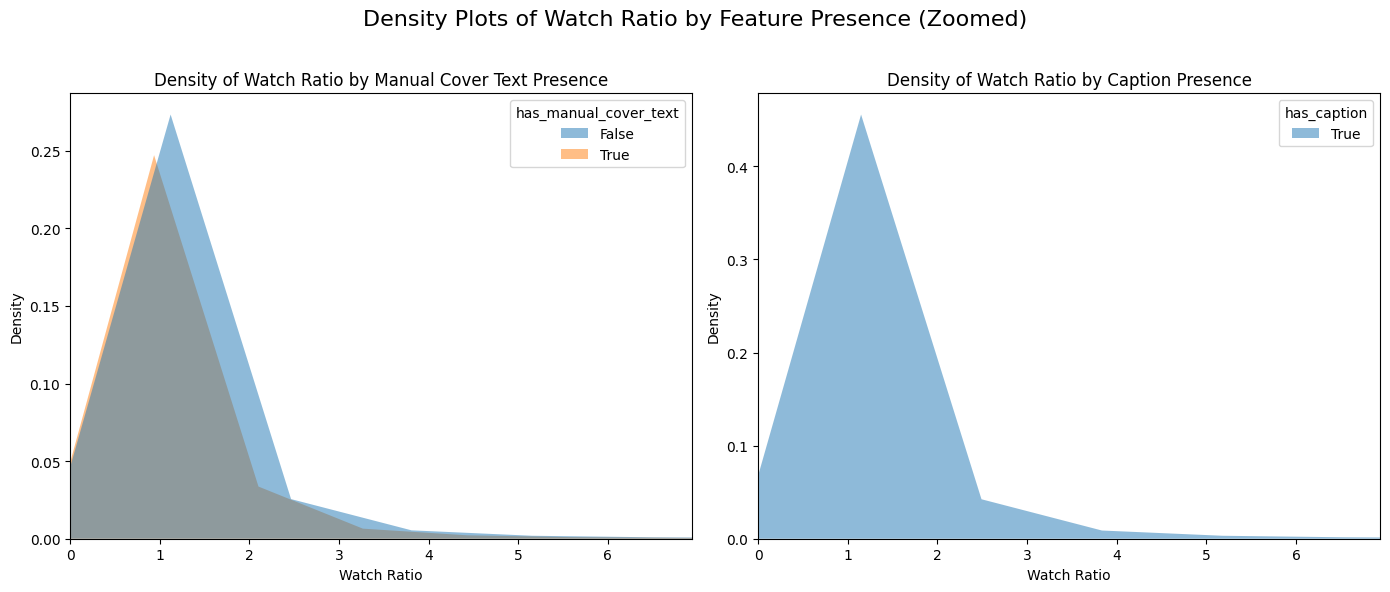

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# --- 1. Load Data (Adjust paths if necessary) ---

try:
    caption_category_df = caption_category # Use if already loaded
    print("Using pre-loaded 'caption_category' DataFrame.")
except NameError:
    print("Loading 'caption_category_cleaned.csv'...")
    try:
        caption_category_df = pd.read_csv('solution/data/caption_category_cleaned.csv')
    except FileNotFoundError:
        print("Error: 'solution/data/caption_category_cleaned.csv' not found. Please check the path.")
        caption_category_df = None

try:
    interactions_df = big_matrix # Use if already loaded, assuming 'big_matrix' contains 'watch_ratio'
    print("Using pre-loaded 'big_matrix' (or equivalent) DataFrame for interactions.")
except NameError:
    print("Loading 'big_matrix_cleaned.csv' for interactions and watch_ratio...")
    try:
        interactions_df = pd.read_csv('solution/data/big_matrix_cleaned.csv')
    except FileNotFoundError:
        print("Error: 'solution/data/big_matrix_cleaned.csv' not found. Please check the path.")
        interactions_df = None

if caption_category_df is not None and interactions_df is not None:
    # --- 2. Merge Data ---
    # Select only necessary columns to save memory before merge
    caption_subset = caption_category_df[['video_id', 'manual_cover_text', 'caption']].copy()
    interactions_subset = interactions_df[['video_id', 'watch_ratio']].copy()
    
    merged_df = pd.merge(interactions_subset, caption_subset, on='video_id', how='inner')
    print(f"Merged DataFrame shape: {merged_df.shape}")

    if not merged_df.empty:
        # --- 3. Create Presence Features ---
        # Presence of manual_cover_text
        merged_df['has_manual_cover_text'] = (
            merged_df['manual_cover_text'].notna() &
            (merged_df['manual_cover_text'] != '') &
            (merged_df['manual_cover_text'].str.upper() != 'UNKNOWN')
        )

        # Presence of caption
        merged_df['has_caption'] = (
            merged_df['caption'].notna() &
            (merged_df['caption'] != '')
        )
        
        display(merged_df[['video_id', 'watch_ratio', 'manual_cover_text', 'has_manual_cover_text', 'caption', 'has_caption']].head())

        # --- 4. Analyze Correlation/Relationship ---
        if 'watch_ratio' in merged_df.columns:
            # Analysis for manual_cover_text
            print("\n--- Analysis for Manual Cover Text ---")
            avg_watch_ratio_cover = merged_df.groupby('has_manual_cover_text')['watch_ratio'].mean()
            median_watch_ratio_cover = merged_df.groupby('has_manual_cover_text')['watch_ratio'].median()
            print("Average watch_ratio by presence of manual_cover_text:\n", avg_watch_ratio_cover)
            print("Median watch_ratio by presence of manual_cover_text:\n", median_watch_ratio_cover)
            
            # Point-biserial correlation for manual_cover_text
            # Ensure no NaNs in watch_ratio or the boolean column for correlation calculation
            valid_data_cover = merged_df[['watch_ratio', 'has_manual_cover_text']].dropna()
            if len(valid_data_cover) > 1 and valid_data_cover['has_manual_cover_text'].nunique() > 1:
                 correlation_cover, p_value_cover = pointbiserialr(valid_data_cover['has_manual_cover_text'], valid_data_cover['watch_ratio'])
                 print(f"Point-biserial correlation (watch_ratio vs has_manual_cover_text): {correlation_cover:.4f}, P-value: {p_value_cover:.4f}")
            else:
                print("Not enough data or variance to calculate point-biserial correlation for manual_cover_text.")


            # Analysis for caption
            print("\n--- Analysis for Caption ---")
            avg_watch_ratio_caption = merged_df.groupby('has_caption')['watch_ratio'].mean()
            median_watch_ratio_caption = merged_df.groupby('has_caption')['watch_ratio'].median()
            print("Average watch_ratio by presence of caption:\n", avg_watch_ratio_caption)
            print("Median watch_ratio by presence of caption:\n", median_watch_ratio_caption)

            # Point-biserial correlation for caption
            valid_data_caption = merged_df[['watch_ratio', 'has_caption']].dropna()
            if len(valid_data_caption) > 1 and valid_data_caption['has_caption'].nunique() > 1:
                correlation_caption, p_value_caption = pointbiserialr(valid_data_caption['has_caption'], valid_data_caption['watch_ratio'])
                print(f"Point-biserial correlation (watch_ratio vs has_caption): {correlation_caption:.4f}, P-value: {p_value_caption:.4f}")
            else:
                print("Not enough data or variance to calculate point-biserial correlation for caption.")

            print("\n--- Density Plots (Zoomed In) ---")
            
            if not merged_df['watch_ratio'].empty:
                min_limit = merged_df['watch_ratio'].quantile(0.005) 
                max_limit = merged_df['watch_ratio'].quantile(0.995)
                
                # Ensure min_limit is less than max_limit, and provide fallbacks
                if pd.isna(min_limit) or pd.isna(max_limit) or min_limit >= max_limit:
                    min_limit = merged_df['watch_ratio'].min()
                    max_limit = merged_df['watch_ratio'].max()

                print(f"Setting x-axis limits for density plots to: ({min_limit:.2f}, {max_limit:.2f}) based on 0.5th and 99.5th percentiles.")

            else:
                min_limit, max_limit = None, None # No data to determine limits
                print("No watch_ratio data to determine x-axis limits for density plots.")


            plt.figure(figsize=(14, 6))

            plt.subplot(1, 2, 1)
            sns.kdeplot(data=merged_df, x='watch_ratio', hue='has_manual_cover_text', fill=True, alpha=.5, linewidth=0)
            plt.title('Density of Watch Ratio by Manual Cover Text Presence')
            plt.xlabel('Watch Ratio')
            plt.ylabel('Density')
            if min_limit is not None and max_limit is not None:
                plt.xlim(min_limit, max_limit) # Apply the calculated x-limits

            plt.subplot(1, 2, 2)
            sns.kdeplot(data=merged_df, x='watch_ratio', hue='has_caption', fill=True, alpha=.5, linewidth=0)
            plt.title('Density of Watch Ratio by Caption Presence')
            plt.xlabel('Watch Ratio')
            plt.ylabel('Density')
            if min_limit is not None and max_limit is not None:
                plt.xlim(min_limit, max_limit) # Apply the calculated x-limits

            plt.suptitle('Density Plots of Watch Ratio by Feature Presence (Zoomed)', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()
        else:
            print("Error: 'watch_ratio' column not found in the merged DataFrame.")
    else:
        print("Merged DataFrame is empty. Cannot perform analysis. Check video_id matching and data loading.")
else:
    print("One or both DataFrames (caption_category_df, interactions_df) could not be loaded. Aborting analysis.")


In [7]:
# Get unique video counts
unique_small_videos = small_matrix['video_id'].nunique()
print(f'Small matrix unique videos: {unique_small_videos}')

# Find videos present in both datasets
small_videos_set = set(small_matrix['video_id'].unique())
caption_videos_set = set(caption_category['video_id'].unique())
overlap = small_videos_set.intersection(caption_videos_set)
print(f'Videos with entry in caption_category: {len(overlap)} ({len(overlap)/unique_small_videos:.2%})')

# Filter caption dataset to only small_matrix videos
caption_subset = caption_category[caption_category['video_id'].isin(small_videos_set)]

# Count videos with non-empty captions
has_caption = caption_subset[caption_subset['caption'].notnull() & (caption_subset['caption'] != '')]
print(f'Videos with non-empty caption: {len(has_caption)} ({len(has_caption)/unique_small_videos:.2%})')

# Count videos with meaningful manual_cover_text (not "UNKNOWN")
has_real_cover = caption_subset[(caption_subset['manual_cover_text'].notnull()) & (caption_subset['manual_cover_text'] != 'UNKNOWN')]
print(f'Videos with real manual_cover_text: {len(has_real_cover)} ({len(has_real_cover)/unique_small_videos:.2%})')

# Parse topic_tags to identify videos with tags
caption_subset['topic_tag_parsed'] = caption_subset['topic_tag'].apply(parse_tag_list_revised)
has_tags = caption_subset[caption_subset['topic_tag_parsed'].apply(lambda x: len(x) > 0)]
print(f'Videos with at least one tag: {len(has_tags)} ({len(has_tags)/unique_small_videos:.2%})')

# Count videos with either captions or tags
has_caption_or_tag = caption_subset[(caption_subset['caption'].notnull() & (caption_subset['caption'] != '')) | 
                                  (caption_subset['topic_tag_parsed'].apply(lambda x: len(x) > 0))]
print(f'Videos with caption OR tags: {len(has_caption_or_tag)} ({len(has_caption_or_tag)/unique_small_videos:.2%})')

# Count videos with both captions and tags
has_caption_and_tag = caption_subset[(caption_subset['caption'].notnull() & (caption_subset['caption'] != '')) & 
                                   (caption_subset['topic_tag_parsed'].apply(lambda x: len(x) > 0))]
print(f'Videos with caption AND tags: {len(has_caption_and_tag)} ({len(has_caption_and_tag)/unique_small_videos:.2%})') 

Small matrix unique videos: 3327
Videos with entry in caption_category: 3167 (95.19%)
Videos with non-empty caption: 3167 (95.19%)
Videos with real manual_cover_text: 1405 (42.23%)
Videos with at least one tag: 1824 (54.82%)
Videos with caption OR tags: 3167 (95.19%)
Videos with caption AND tags: 1824 (54.82%)


/tmp/ipykernel_2824605/1194994153.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caption_subset['topic_tag_parsed'] = caption_subset['topic_tag'].apply(parse_tag_list_revised)
